# Microscopie hyperspectrale

Quentin Douzery  
Alexia Ghozland

## 1. Imports

### 1.1. Packages

In [ ]:
from matplotlib import pyplot as plt
from joblib import Parallel, delayed
from tqdm import tqdm
import h5py
import numpy as np
import os
import math
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 1.2. Images

In [ ]:
#Dictionnaire qui contient les fichiers des images originales
#path_dir = "/content/gdrive/My Drive/Hyperspectral" #drive directory
path_dir = "/content/gdrive/My Drive/Hyperspectral/Images-hyperspectrales"
#path_dir = "/home/douzery/Bureau" #local directory

raw_images_names = {"j5_1_740nm":os.path.join(path_dir, "j5-740nm/hdf5-images/j5_1_740nm.h5"),
                    "j5_2_740nm":os.path.join(path_dir, "j5-740nm/hdf5-images/j5_2_740nm.h5"),
                    "j5_3_740nm":os.path.join(path_dir, "j5-740nm/hdf5-images/j5_3_740nm.h5"),
                    "j5_4_740nm":os.path.join(path_dir, "j5-740nm/hdf5-images/j5_4_740nm.h5"),
                    "j5_1_780nm":os.path.join(path_dir, "j5-780nm/hdf5-images/j5_1_780nm.h5"),
                    "j5_2_780nm":os.path.join(path_dir, "j5-780nm/hdf5-images/j5_2_780nm.h5"),
                    "j5_3_780nm":os.path.join(path_dir, "j5-780nm/hdf5-images/j5_3_780nm.h5"),
                    "j5_4_780nm":os.path.join(path_dir, "j5-780nm/hdf5-images/j5_4_780nm.h5"),
                    "j5_1_820nm":os.path.join(path_dir, "j5-820nm/hdf5-images/j5_1_820nm.h5"),
                    "j5_2_820nm":os.path.join(path_dir, "j5-820nm/hdf5-images/j5_2_820nm.h5"),
                    "j5_3_820nm":os.path.join(path_dir, "j5-820nm/hdf5-images/j5_3_820nm.h5"),
                    "j5_4_820nm":os.path.join(path_dir, "j5-820nm/hdf5-images/j5_4_820nm.h5"),
                    "v2_1_740nm":os.path.join(path_dir, "v2-740nm/hdf5-images/v2_1_740nm.h5"),
                    "v2_2_740nm":os.path.join(path_dir, "v2-740nm/hdf5-images/v2_2_740nm.h5"),
                    "v2_3_740nm":os.path.join(path_dir, "v2-740nm/hdf5-images/v2_3_740nm.h5"),
                    "v2_4_740nm":os.path.join(path_dir, "v2-740nm/hdf5-images/v2_4_740nm.h5"),
                    "v6_3_740nm":os.path.join(path_dir, "v6-740nm/hdf5-images/v6_3_740nm.h5"),
                    "v6_4_740nm":os.path.join(path_dir, "v6-740nm/hdf5-images/v6_4_740nm.h5"),
                    "v6_5_740nm":os.path.join(path_dir, "v6-740nm/hdf5-images/v6_5_740nm.h5"),
                    "v6_6_740nm":os.path.join(path_dir, "v6-740nm/hdf5-images/v6_6_740nm.h5"),
                    "v6_3_780nm":os.path.join(path_dir, "v6-780nm/hdf5-images/v6_3_780nm.h5"),
                    "v6_4_780nm":os.path.join(path_dir, "v6-780nm/hdf5-images/v6_4_780nm.h5"),
                    "v6_5_780nm":os.path.join(path_dir, "v6-780nm/hdf5-images/v6_5_780nm.h5"),
                    "v6_6_780nm":os.path.join(path_dir, "v6-780nm/hdf5-images/v6_6_780nm.h5"),
                    "v6_3_820nm":os.path.join(path_dir, "v6-820nm/hdf5-images/v6_3_820nm.h5"),
                    "v6_4_820nm":os.path.join(path_dir, "v6-820nm/hdf5-images/v6_4_820nm.h5"),
                    "v6_5_820nm":os.path.join(path_dir, "v6-820nm/hdf5-images/v6_5_820nm.h5"),
                    "v6_6_820nm":os.path.join(path_dir, "v6-820nm/hdf5-images/v6_6_820nm.h5")}

In [ ]:
#Dictionnaire qui contient les fichiers des images après segmentation
segmented_images_names = {"j5_1_740nm":os.path.join(path_dir, "j5-740nm/segmented-images/j5_1_740nm_Simple-Segmentation.h5"),
                          "j5_2_740nm":os.path.join(path_dir, "j5-740nm/segmented-images/j5_2_740nm_Simple-Segmentation.h5"),
                          "j5_3_740nm":os.path.join(path_dir, "j5-740nm/segmented-images/j5_3_740nm_Simple-Segmentation.h5"),
                          "j5_4_740nm":os.path.join(path_dir, "j5-740nm/segmented-images/j5_4_740nm_Simple-Segmentation.h5"),
                          "j5_1_780nm":os.path.join(path_dir, "j5-780nm/segmented-images/j5_1_780nm_Simple-Segmentation.h5"),
                          "j5_2_780nm":os.path.join(path_dir, "j5-780nm/segmented-images/j5_2_780nm_Simple-Segmentation.h5"),
                          "j5_3_780nm":os.path.join(path_dir, "j5-780nm/segmented-images/j5_3_780nm_Simple-Segmentation.h5"),
                          "j5_4_780nm":os.path.join(path_dir, "j5-780nm/segmented-images/j5_4_780nm_Simple-Segmentation.h5"),
                          "j5_1_820nm":os.path.join(path_dir, "j5-820nm/segmented-images/j5_1_820nm_Simple-Segmentation.h5"),
                          "j5_2_820nm":os.path.join(path_dir, "j5-820nm/segmented-images/j5_2_820nm_Simple-Segmentation.h5"),
                          "j5_3_820nm":os.path.join(path_dir, "j5-820nm/segmented-images/j5_3_820nm_Simple-Segmentation.h5"),
                          "j5_4_820nm":os.path.join(path_dir, "j5-820nm/segmented-images/j5_4_820nm_Simple-Segmentation.h5"),
                          "v2_1_740nm":os.path.join(path_dir, "v2-740nm/segmented-images/v2_1_740nm_Simple-Segmentation.h5"),
                          "v2_2_740nm":os.path.join(path_dir, "v2-740nm/segmented-images/v2_2_740nm_Simple-Segmentation.h5"),
                          "v2_3_740nm":os.path.join(path_dir, "v2-740nm/segmented-images/v2_3_740nm_Simple-Segmentation.h5"),
                          "v2_4_740nm":os.path.join(path_dir, "v2-740nm/segmented-images/v2_4_740nm_Simple-Segmentation.h5"),
                          "v6_3_740nm":os.path.join(path_dir, "v6-740nm/segmented-images/v6_3_740nm_Simple-Segmentation.h5"),
                          "v6_4_740nm":os.path.join(path_dir, "v6-740nm/segmented-images/v6_4_740nm_Simple-Segmentation.h5"),
                          "v6_5_740nm":os.path.join(path_dir, "v6-740nm/segmented-images/v6_5_740nm_Simple-Segmentation.h5"),
                          "v6_6_740nm":os.path.join(path_dir, "v6-740nm/segmented-images/v6_6_740nm_Simple-Segmentation.h5"),
                          "v6_3_780nm":os.path.join(path_dir, "v6-780nm/segmented-images/v6_3_780nm_Simple-Segmentation.h5"),
                          "v6_4_780nm":os.path.join(path_dir, "v6-780nm/segmented-images/v6_4_780nm_Simple-Segmentation.h5"),
                          "v6_5_780nm":os.path.join(path_dir, "v6-780nm/segmented-images/v6_5_780nm_Simple-Segmentation.h5"),
                          "v6_6_780nm":os.path.join(path_dir, "v6-780nm/segmented-images/v6_6_780nm_Simple-Segmentation.h5"),
                          "v6_3_820nm":os.path.join(path_dir, "v6-820nm/segmented-images/v6_3_820nm_Simple-Segmentation.h5"),
                          "v6_4_820nm":os.path.join(path_dir, "v6-820nm/segmented-images/v6_4_820nm_Simple-Segmentation.h5"),
                          "v6_5_820nm":os.path.join(path_dir, "v6-820nm/segmented-images/v6_5_820nm_Simple-Segmentation.h5"),
                          "v6_6_820nm":os.path.join(path_dir, "v6-820nm/segmented-images/v6_6_820nm_Simple-Segmentation.h5")}

In [ ]:
#Dictionnaire qui contient les images originales (format hdf5)
aux_raw_images = {}
for name, path in raw_images_names.items():
    aux_raw_images[name] = h5py.File(path, 'r')

In [ ]:
#Dictionnaire qui contient les images après segmentation (format hdf5)
aux_segmented_images = {}
for name, path in segmented_images_names.items():
    aux_segmented_images[name] = h5py.File(path, 'r')

In [ ]:
#Dictionnaire qui contient les images originales (utilisables, tableau Python)
raw_images = {}
for name, img in tqdm(aux_raw_images.items()):
  z = img['data'].shape[1]
  raw_images[name] = np.reshape(img['data'], (z,512,512,32))

100%|██████████| 28/28 [04:32<00:00,  9.73s/it]


In [ ]:
#Dictionnaire qui contient les images après segmentation (utilisables, tableau Python)
segmented_images = {}
for name, img in tqdm(aux_segmented_images.items()):
  z = img['exported_data'].shape[1]
  segmented_images[name] = np.reshape(img['exported_data'], (z,512,512))

100%|██████████| 28/28 [00:05<00:00,  5.26it/s]


## 2. Caractéristiques des images

In [ ]:
print("Dimensions d'une image originale (z, y, x, c) :", raw_images["j5_1_740nm"].shape)
print("Dimensions d'une image segmentée (z, y, x) :", segmented_images["j5_1_740nm"].shape)

Dimensions d'une image originale (z, y, x, c) : (12, 512, 512, 32)
Dimensions d'une image segmentée (z, y, x) : (12, 512, 512)


## 3. Aperçu des images

In [ ]:
print("Valeurs des 32 canaux du premier voxel d'une image originale :", raw_images["j5_1_740nm"][0][0][0][:], "\n")
print("Valeur du premier voxel d'une image image segmentée (1 = muscle // 2 = non muscle) :", segmented_images["j5_1_740nm"][0][0][0])

Valeurs des 32 canaux du premier voxel d'une image originale : [173 236 207 191  34 160  45 193 187 247  64  93 312  84 264 204 140 224
 125 180  95 146 130 183 179 120   2 119 261 158 177 119] 

Valeur du premier voxel d'une image image segmentée (1 = muscle // 2 = non muscle) : 2


## 4. Modification des images segmentées

In [ ]:
#Création d'un "filtre" pour isoler les valeurs des voxels correspondant à du muscle
def Filter_muscle (img):
  z = img.shape[0]
  filter = img - 2*np.ones((z,512,512))
  filter = np.abs(filter)
  return filter

In [ ]:
#Création d'un "filtre" pour isoler les valeurs des voxels correspondant à ce qui n'est pas du muscle
def Filter_autre (img):
  z = img.shape[0]
  filter = img - np.ones((z,512,512))
  filter = np.abs(filter)
  return filter

## 5. Spectres moyens des images

In [ ]:
def Mean_spectrum (img, img_s):
  #Création du filtre associé à l'image
  filtre = Filter_muscle(img_s)

  #Utiles
  MEAN_SPECTRUM = np.zeros(32) #initialisation du spectre moyen
  unique, counts = np.unique(filtre, return_counts=True)
  d = dict(zip(unique, counts))

  #Calcul du spectre moyen
  for i in range(32):
    muscle = filtre*img[:,:,:,i]
    MEAN_SPECTRUM[i] = np.sum(muscle)/d[1]

  return MEAN_SPECTRUM

In [97]:
name1 = "j5_1_740nm"
name2 = "j5_2_740nm"
name3 = "j5_3_740nm"
name4 = "j5_4_740nm"
MEAN_SPECTRUM_1 = Mean_spectrum(raw_images[name1], segmented_images[name1])
MEAN_SPECTRUM_2 = Mean_spectrum(raw_images[name2], segmented_images[name2])
MEAN_SPECTRUM_3 = Mean_spectrum(raw_images[name3], segmented_images[name3])
MEAN_SPECTRUM_4 = Mean_spectrum(raw_images[name4], segmented_images[name4])

Affichage des 4 spectres moyens d'une même image


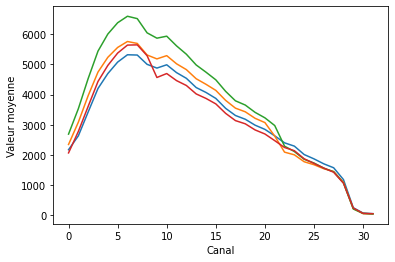

In [98]:
print("Affichage des 4 spectres moyens d'une même image")
plt.plot(MEAN_SPECTRUM_1)
plt.plot(MEAN_SPECTRUM_2)
plt.plot(MEAN_SPECTRUM_3)
plt.plot(MEAN_SPECTRUM_4)
plt.ylabel("Valeur moyenne")
plt.xlabel("Canal")
plt.show()

In [ ]:
T = []
for name, img in raw_images.items():
  MS = Mean_spectrum(raw_images[name], segmented_images[name])
  T.append(MS)

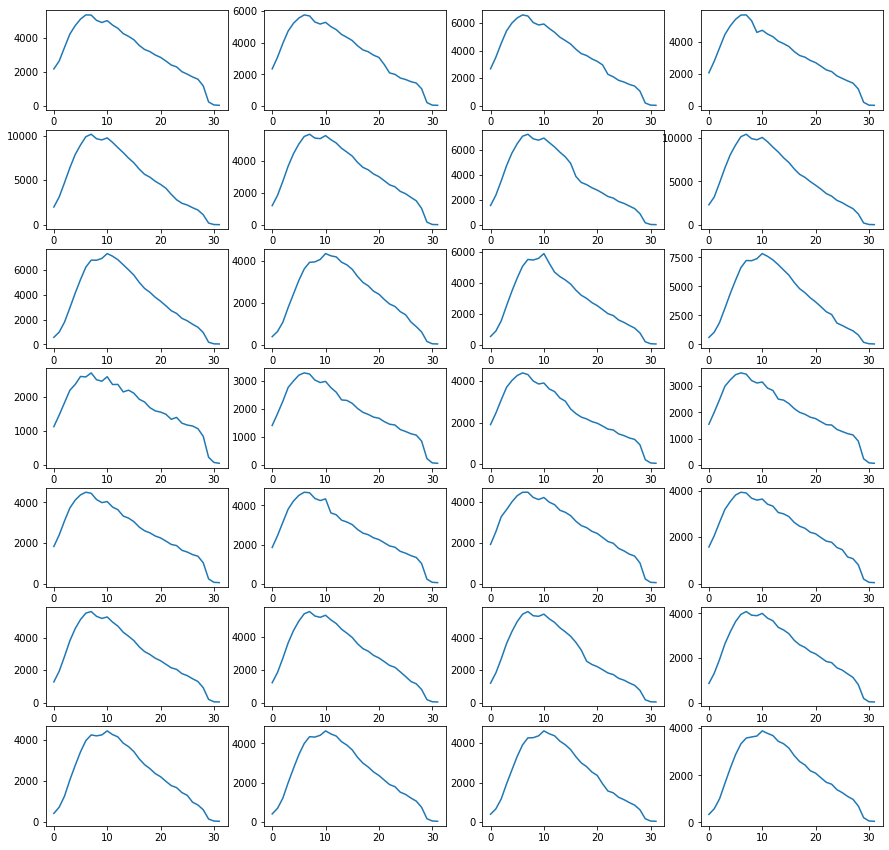

In [ ]:
c = 0
fig, axs = plt.subplots(7, 4, figsize=(15,15))
for i in range(7):
  for j in range(4):
    axs[i,j].plot(T[c])
    c+=1

In [ ]:
M = []
for i in range(28):
  M.append(np.mean(T[i]))

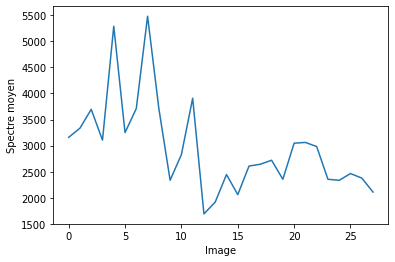

In [ ]:
plt.plot(M)
plt.xlabel("Image")
plt.ylabel("Spectre moyen")
plt.show()

## 6. Stockage

In [ ]:
Muscle = pd.DataFrame(columns=["Image", "Âge", "C00", "C01", "C02", "C03", "C04", "C05", "C06", "C07", "C08", "C09", "C10", "C11", "C12", "C13", "C14",
                               "C15", "C16", "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26", "C27", "C28", "C29", "C30", "C31"])

## 6.1 Souris jeunes

## 6.2 Souris âgées

In [ ]:
AUX0 = np.copy(MEAN_SPECTRUM)
AUX = np.array(["j5_1_740nm", "Jeune"])
AUX = np.append(AUX, AUX0)
Df_aux = pd.Series(AUX, index = Muscle.columns)

In [ ]:
Muscle = Muscle.append(Df_aux, ignore_index=True)

In [ ]:
Muscle

,Image,Âge,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31
0,j5_1_740nm,Jeune,2173.524010318712,2634.3712682420637,3425.23209131723,4202.452455292479,4694.930900496162,5074.954744507646,5318.67823613174,5309.326855781744,5001.528472257349,4877.456207551421,4986.915022371005,4727.20228477009,4538.631107575486,4232.871226090462,4070.4012265349697,3872.818124269053,3544.0682288816643,3307.0601434380687,3182.953617910292,2986.6278320128386,2847.9779370852857,2633.568148410425,2402.034231698924,2292.6129164769845,2013.791881448237,1870.553599210309,1705.8596259696785,1576.254445461192,1185.074928687154,252.25361009308605,74.72763321055722,55.25420481386619


## Annexes : Tests code

In [ ]:
def test(dset) :
  if (dset[0][z][y][x][0]==1)
#MEAN_CHANNELS[c] += dset[0][z][y][x][c]
#def sqrt_func(i, j):
    #time.sleep(1)
    #return math.sqrt(i**j)

#Parallel(n_jobs=2)(delayed(sqrt_func)(i, j) for i in range(5) for j in range(2))


SyntaxError: ignored